In [1]:
from binance.client import Client
from Indicators.createDi import set_pos_dm, set_neg_dm, set_avg_neg_dm, set_avg_pos_dm,set_neg_di,set_pos_di
from Indicators.createAdx import set_adx
from Indicators.createIndicator import Indicators
from Indicators.createTR import set_tr, set_atr
from history.retrieve import RetrieveHistory
from services.rest import BinanceRest
from services.setup import ClientSetup
from utils.constants import AppConstants
import pandas as pd
import numpy as np


In [2]:
symbol = "XRPUSDT"
interval = Client.KLINE_INTERVAL_1MINUTE
client = ClientSetup(AppConstants.ENV_TEST).setup()
history = RetrieveHistory(symbol, interval, client)
data = history.get_historical_klines("6 hours ago UTC")
df = history.set_panda_dataFrame(data)

In [3]:
df

,Open,High,Low,Close,Volume,Number Of Trades
Open Time,,,,,,
2020-08-20 16:11:00,0.29122,0.29140,0.29122,0.29140,30019.6,37
2020-08-20 16:12:00,0.29140,0.29140,0.29136,0.29139,19625.4,23
2020-08-20 16:13:00,0.29140,0.29177,0.29140,0.29157,373154.5,156
2020-08-20 16:14:00,0.29157,0.29165,0.29138,0.29162,96515.6,44
2020-08-20 16:15:00,0.29166,0.29167,0.29143,0.29167,64756.8,48
...,...,...,...,...,...,...
2020-08-20 22:06:00,0.28952,0.28980,0.28950,0.28950,142211.0,58
2020-08-20 22:07:00,0.28949,0.28983,0.28943,0.28975,92238.0,63
2020-08-20 22:08:00,0.28970,0.29006,0.28969,0.28999,171642.6,142


In [4]:
indicators = Indicators(df)
df = indicators.set_bb(20,2,'Close')
df



,Open,High,Low,Close,Volume,Number Of Trades,20MAClose,20STDClose,20UpperBandClose,20LowerBandClose
Open Time,,,,,,,,,,
2020-08-20 16:11:00,0.29122,0.29140,0.29122,0.29140,30019.6,37,NaN,NaN,NaN,NaN
2020-08-20 16:12:00,0.29140,0.29140,0.29136,0.29139,19625.4,23,NaN,NaN,NaN,NaN
2020-08-20 16:13:00,0.29140,0.29177,0.29140,0.29157,373154.5,156,NaN,NaN,NaN,NaN
2020-08-20 16:14:00,0.29157,0.29165,0.29138,0.29162,96515.6,44,NaN,NaN,NaN,NaN
2020-08-20 16:15:00,0.29166,0.29167,0.29143,0.29167,64756.8,48,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-20 22:06:00,0.28952,0.28980,0.28950,0.28950,142211.0,58,0.289170,0.000319,0.289808,0.288532
2020-08-20 22:07:00,0.28949,0.28983,0.28943,0.28975,92238.0,63,0.289207,0.000342,0.289890,0.288524
2020-08-20 22:08:00,0.28970,0.29006,0.28969,0.28999,171642.6,142,0.289264,0.000373,0.290010,0.288517


In [5]:
# retrieve certain index
#df.loc['2020-08-10 23:00:00']

<AxesSubplot:xlabel='Open Time'>

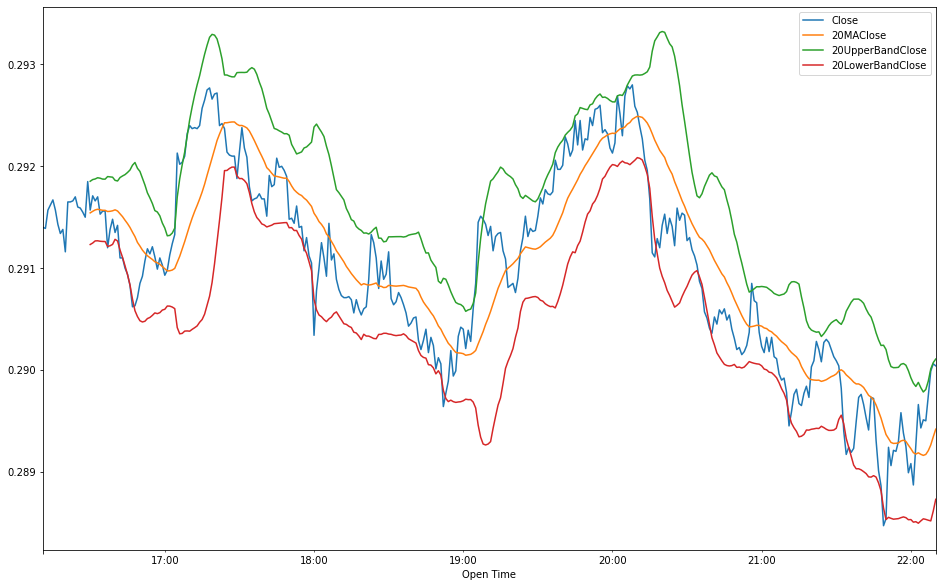

In [6]:
# plot bb
df[['Close','20MAClose','20UpperBandClose','20LowerBandClose']].plot(figsize=(16,10))

In [7]:
#adx = CreateAdx(df,14) 
#df['adx'] = adx.adx
#df['pDIs'] = adx.pDIs
#df['nDIs'] = adx.nDIs

#df[['adx','pDIs','nDIs']].plot(figsize=(16,10))
#df[['adx','pDIs','nDIs']]


In [8]:
# max rows defaults to 60
# pd.get_option("max_rows")
pd.set_option("max_rows", None)
df


,Open,High,Low,Close,Volume,Number Of Trades,20MAClose,20STDClose,20UpperBandClose,20LowerBandClose
Open Time,,,,,,,,,,
2020-08-20 16:11:00,0.29122,0.29140,0.29122,0.29140,30019.6,37,NaN,NaN,NaN,NaN
2020-08-20 16:12:00,0.29140,0.29140,0.29136,0.29139,19625.4,23,NaN,NaN,NaN,NaN
2020-08-20 16:13:00,0.29140,0.29177,0.29140,0.29157,373154.5,156,NaN,NaN,NaN,NaN
2020-08-20 16:14:00,0.29157,0.29165,0.29138,0.29162,96515.6,44,NaN,NaN,NaN,NaN
2020-08-20 16:15:00,0.29166,0.29167,0.29143,0.29167,64756.8,48,NaN,NaN,NaN,NaN
2020-08-20 16:16:00,0.29159,0.29159,0.29149,0.29157,20606.2,30,NaN,NaN,NaN,NaN
2020-08-20 16:17:00,0.29156,0.29156,0.29135,0.29143,99730.7,44,NaN,NaN,NaN,NaN
2020-08-20 16:18:00,0.29151,0.29151,0.29113,0.29134,140239.3,91,NaN,NaN,NaN,NaN
2020-08-20 16:19:00,0.29132,0.29139,0.29115,0.29138,115078.0,66,NaN,NaN,NaN,NaN


In [9]:
# H - L 

# df['truthy'] = np.isnan(df['Close'].shift())
# df['val']=np.isnan(df['Close'].shift())
# df["H-pC"] = np.where(df['val'], np.nan, abs(df['High'] - df['Close'].shift()))

# df = set_tr(df)
# df = set_pos_dm(df)
# df = set_neg_dm(df)
# df = set_atr(df,14)
# df = set_avg_pos_dm(df,14)
# df = set_avg_neg_dm(df,14)
# df = set_pos_di(df,14)
# df = set_neg_di(df,14)

df = set_adx(df,14)
# ATR CALC

df


,Open,High,Low,Close,Volume,Number Of Trades,20MAClose,20STDClose,20UpperBandClose,20LowerBandClose,TR,ATR,pos_di,neg_di,adx
Open Time,,,,,,,,,,,,,,,
2020-08-20 16:11:00,0.29122,0.29140,0.29122,0.29140,30019.6,37,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2020-08-20 16:12:00,0.29140,0.29140,0.29136,0.29139,19625.4,23,NaN,NaN,NaN,NaN,0.00004,0.000000,NaN,NaN,NaN
2020-08-20 16:13:00,0.29140,0.29177,0.29140,0.29157,373154.5,156,NaN,NaN,NaN,NaN,0.00038,0.000000,NaN,NaN,NaN
2020-08-20 16:14:00,0.29157,0.29165,0.29138,0.29162,96515.6,44,NaN,NaN,NaN,NaN,0.00027,0.000000,NaN,NaN,NaN
2020-08-20 16:15:00,0.29166,0.29167,0.29143,0.29167,64756.8,48,NaN,NaN,NaN,NaN,0.00024,0.000000,NaN,NaN,NaN
2020-08-20 16:16:00,0.29159,0.29159,0.29149,0.29157,20606.2,30,NaN,NaN,NaN,NaN,0.00018,0.000000,NaN,NaN,NaN
2020-08-20 16:17:00,0.29156,0.29156,0.29135,0.29143,99730.7,44,NaN,NaN,NaN,NaN,0.00022,0.000000,NaN,NaN,NaN
2020-08-20 16:18:00,0.29151,0.29151,0.29113,0.29134,140239.3,91,NaN,NaN,NaN,NaN,0.00038,0.000000,NaN,NaN,NaN
2020-08-20 16:19:00,0.29132,0.29139,0.29115,0.29138,115078.0,66,NaN,NaN,NaN,NaN,0.00024,0.000000,NaN,NaN,NaN


<AxesSubplot:xlabel='Open Time'>

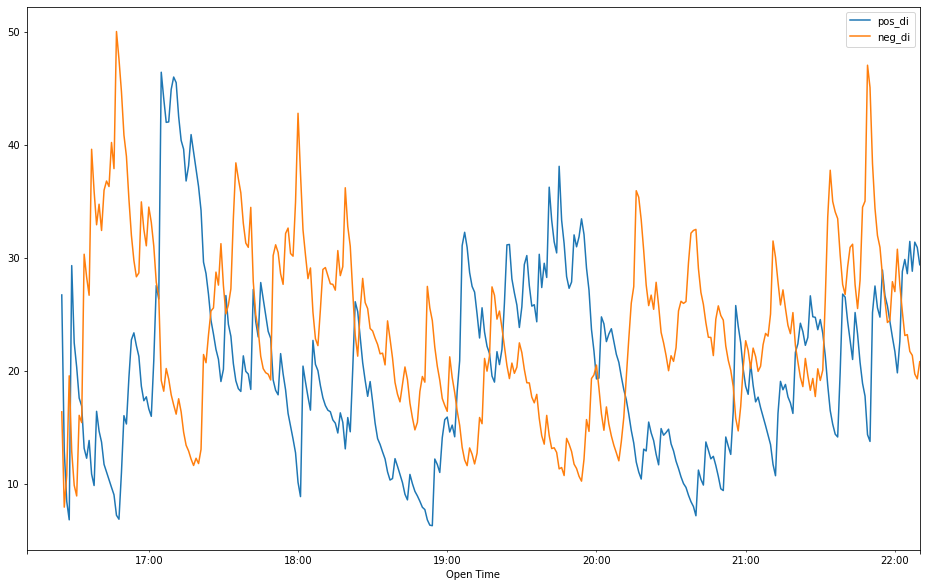

In [10]:
df[['pos_di','neg_di']].plot(figsize=(16,10))

